# Introduction to machine learning with python

Question: When we talk about machine learning, what method do you think about?

<img src=https://github.com/bharris12/URP_2021_Programming_Course/raw/main/lecture_8/figure/table.png>

# Part 1 Linear regression

### Importing required packages

In [1]:
!pip install palmerpenguins

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
#imports
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from palmerpenguins import load_penguins

In [3]:
### Load sample data and poke around to understand it
penguinsdf = load_penguins()
penguinsdf.head()
penguinsdf.dropna(inplace = True)
penguinsdf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


now lets look at some visulizations for the correlation between different features

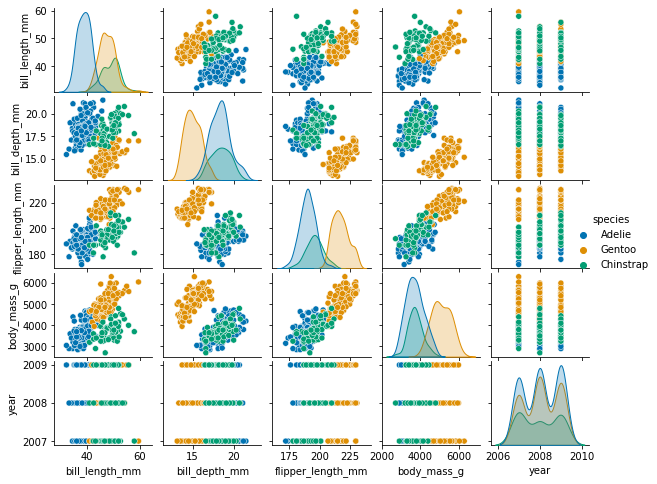

In [4]:
pairplot_figure = sns.pairplot(penguinsdf, hue='species',palette='colorblind')
pairplot_figure.fig.set_size_inches(9, 6.5)

Which correlation looks most linear? Let's plot the body_mass_g against flipper_length_mm. 

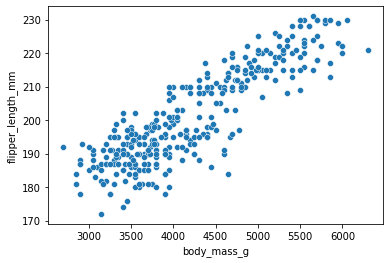

In [5]:
data_column = "body_mass_g"
target_column = "flipper_length_mm"
_ = sns.scatterplot(data=penguinsdf, x=data_column, y=target_column)

Now lets try building a linear regression model that use body mass to predict flipper length. First we neet to split the data in to train/test sets using a 50/50 split

In [6]:
def splitdata(data, testratio):
    #set seed so train and test will always split the same
    np.random.seed(42)
    #generate shuffled index same size as data length
    shuffindices = np.random.permutation(len(data))
    testsize = int(len(data) * testratio)
    #take index belong to test set
    testindices = shuffindices[:testsize]
    #take index belong to train set
    trainindices = shuffindices[testsize:]
    #get from dataframe and return 2 dataset
    return data.iloc[trainindices], data.iloc[testindices]

In [7]:
#split the test/train set
x_train, x_test = splitdata(penguinsdf, 0.5)
y_train = x_train['flipper_length_mm']
y_test = x_test['flipper_length_mm']

In [8]:
#fit the linear model
reg = LinearRegression().fit(x_train.loc[:,["body_mass_g"]], y_train)

R^2 is one of the most commonly used metrice to evaluate a linear regression fit: https://en.wikipedia.org/wiki/Coefficient_of_determination

It is pearson's R^2

In [10]:
#how good is the fit based on the R^2 coefficient of determination
reg.score(x_train.loc[:,["body_mass_g"]], y_train)

0.7290721617851773

In [12]:
#predict the held out test set
predictions = reg.predict(x_test.loc[:,["body_mass_g"]])

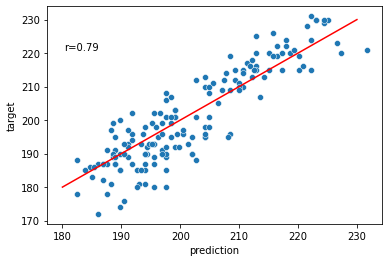

In [13]:
#compute r2 and plot prediction against ground truth of test set
ax =sns.scatterplot(x = predictions, y = y_test)
ax.set(xlabel='prediction', ylabel='target')
r2 = reg.score(x_test.loc[:,["body_mass_g"]], y_test)
ax.text(.05, .8, 'r={:.2f}'.format(r2),
            transform=ax.transAxes)
lims = [180,230]
ax.plot(lims, lims, '-r')
plt.show()

# Activity 1

In [ ]:
#Another commonly used toy dataset: Iris 
#Try replicate what we did on the penguin dataset on this.
iris = datasets.load_iris()
irisdf = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
ylabels = pd.Series(data=iris['target'], name="iris type")
irisdf['label'] = ylabels
irisdf

In [ ]:
## Find features thats most linearly correlated

In [ ]:
## Split data into training and test set

In [ ]:
## Create linear model from training data

In [ ]:
## How good is the fit based on the R^2 coefficient of determination

In [ ]:
## Test the model using test data

## Resource: Other machine learning methods you can implements through sklearn

https://scikit-learn.org/stable/

# Part 2: Deep learning model

More specifically, we will use some classification models to expain the main concepts of deep learning.

## Mutilayer Perceptron (MLP)

The most basic model structure is what we call Multilayer Perceptron
<img src=https://miro.medium.com/max/600/1*xxZXeKfVKTRqh54t10815A.jpeg />
Its construted by baisc units that are called 'Neurons' or 'Perceptrons'. Each individual one is actually very simply constructed.
<img src=https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Single-Perceptron.png.webp />

Although each one is a very simple function approximater, by layering them together, the model now has a much greater power and flexibility in approximating functions. But after all, neural networks can be thing of as a function approximator, but with less assumptions.
A fun app for visualiztion MLP: https://playground.tensorflow.org/

## Convolutional Layer

MLP isn't the best fit on all problems. Especially things like images. How do we get 'feature' from images? Per pixel? Thats just way too much. So another kind of layer comes into play.
![ChessUrl](https://miro.medium.com/max/1052/0*jLoqqFsO-52KHTn9.gif)

We call the weight we have learnt 'filters'. It to some extent represents what pattern the model has learnt to look for. And there are usually multiple filters per convolution layer, give the model the ability to learn more than one pattern.

<img src=https://www.researchgate.net/publication/336805909/figure/fig1/AS:817888827023360@1572011300751/Schematic-diagram-of-a-basic-convolutional-neural-network-CNN-architecture-26.ppm />

## Pooling layer

As seen in the above figure structure, pooling layers often exist in deep learning models. Its main usage is to condense information. There are several ways pooling can be done:
<img src=https://miro.medium.com/max/1400/1*oP-lySI7atBfDgpWQjnB6w.png />


# Convolutional Neural Networks for regulatory genomics

In this part, we will walk through how to build, train, and evaluate a convolutional neural network (CNN) for the computational task of predicting transcription factor binding sites from Chromatin Immunoprecipitation sequencing (ChIP-seq) data.

We will employ a CNN model to experimental ChIP-seq data for CTCF, a transciption factor that is known to bind to DNA and help form loops. We will set this up as a supervised learning task, specifically a binary classification, where we give the model a sequence and it has to predict whether or not it is associated with TF binding (i.e. presence or absence of a ChIP-seq peak). Thus, we need a set of background sequences which don't have a ChIP-seq peak. 


In [ ]:
import h5py # python module needed to load dataset (stored in an hdf5 file format)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget https://www.dropbox.com/s/0ks4dk6md2l9mqx/CTCF_200.h5

In [ ]:
# load dataset
file_path = 'CTCF_200.h5'
dataset = h5py.File(file_path, 'r')
x_train = np.array(dataset['x_train']).transpose([0,2,1])
y_train = np.array(dataset['y_train'])
x_valid = np.array(dataset['x_valid']).transpose([0,2,1])
y_valid = np.array(dataset['y_valid'])
x_test = np.array(dataset['x_test']).transpose([0,2,1])
y_test = np.array(dataset['y_test'])

alphabet = 'ACGT'

# print shape of training data
print(x_train.shape)

There should be 51,156 training sequences each 200 nts long with an alphabet size of 4. Let's see what a sequence actually looks like:

In [ ]:
print(x_train)

This format is called 'one-hot encoding'. Every column in this 2d array represents on letter in the alphabet 'ACTG'. This is how sequence data is usually treated in deep learning problems

In [ ]:
print(y_train.shape)
print(y_train)

# Neural Network implementation

TensorFlow is a widely used deep learning framework. Meaning that all the function/layers that we have mentioned above is already implemented as easy-to-use functions. For this class we will especially depend on TensorFlow.keras.

There are lots of classes/blogs online for tensorflow tutorial. Tensorflow itself also come with a few tutorials:
https://www.tensorflow.org/tutorials


In [15]:
from tensorflow import keras

# import modules that will make it easy to build and train the linear regression model
from tensorflow.keras import models, layers

# let's setup a sequential model -- which means that the model will be feed 
# forward (all models in this course will be sequential)
model = models.Sequential()

# the input layer specifies the shape of the input data to the model. Since our input 
# features, x, are 1-dimensional, we can set this value to 1. All models require
# some input layer (where you feed in data).
model.add(layers.InputLayer(input_shape=(200,4)))
model.add(layers.Conv1D(filters=24, kernel_size=19, activation='relu', padding='same'))
model.add(layers.MaxPool1D(pool_size=25))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))

# a dense connection to 1 unit means that the inputs are fully connected to the 
# output neuron (in this case a single output neuron). Linear is the default 
# activation, but here we explicitly write it.
model.add(layers.Dense(units=1, activation='linear'))
model.add(layers.Activation('sigmoid'))

ModuleNotFoundError: No module named 'tensorflow'

After we build the model, we can print a summary that shows the order of the layers, the shapes and number of parameters:

In [ ]:
model.summary()

### Build loss function

For both training and evaluation, we need to define a loss function that measures how closely the model's predictions match the target classes. This is usually a log-likelihood function for supervised learning. The log-likelihood for a binary classification is the binary cross-entropy loss function

Fortunately, Keras makes this super easy as you'll see below.

### Build optimizer

ADAM is the best introductory optimizer for most tasks. It performs an adaptive learning rate based on previous gradients and hence it is much faster to converge and leads to consistently good solutions.  

For more info on adam: https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

In [ ]:
# Now that we built the model, we have to set up the loss function and the optimizer.
# Since it's a linear regression, we will set it to 'mean_squared_error'. 
# we will set the optimizer to stochastic gradient descent 'sgd' (even though this
# is unnecessary for a linear regression)

loss = keras.losses.BinaryCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# a short cut is: model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auroc])

### Fit the model

We want to train our CNN model with mini-batch stochastic gradient descent. So, we need a way to generate mini-batches of data. Keras handles all of this for you through the setting batch_size. It also lets you select the number of epochs to train.  You can also monitor validation performance by adding the validation_data flag.  

In [ ]:
# Now let's fit the model. The main inputs are x, y, epochs, which sets the number 
# of times to run through the dataset with SGD. Also, we set verbose to false,
# because too many outputs are written and it is overwhelming for a linear model.
# We will turn this flag to true for other datasets later.
model.fit(x_train, y_train, batch_size=100, epochs=30, validation_data=(x_valid, y_valid))

In [ ]:
# evaluate model
model.evaluate(x_test, y_test)

Now while these saliency plots seem to find a motif pattern that resembles the CTCF motif (see: https://www.factorbook.org/tf/human/CTCF/motif/ENCSR000BIE), the saliency maps are really noisy.  From my experience, this arises because of overfitting, which leads to spurious saliency maps as well -- here overfitting does not affect classification performance on the test set and is termed benign overfitting.


# Redo analysis

Let's redo this analysis with some regularization added to our CNN model. A very effective regularization is dropout and early stopping. For convolutional layers, let's add a dropout rate of 0.2 and for dense layers let's use a dropout of 0.5.  For early stopping, there is a built in "callback" in keras. Callbacks are objects taht perform actions during training. The early stopping call back checks whether the model's validation performance hasn't improved for x number of epochs. if the x number of epochs exceeds your patience, then training loop is stopped.  See below for example code.

In [ ]:
from tensorflow import keras
from tensorflow.keras import models, layers

# build model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(200,4)))
model.add(layers.Conv1D(filters=24, kernel_size=19, activation='relu', padding='same'))
model.add(layers.MaxPool1D(pool_size=25))
model.add(layers.Dropout(0.2))   # <-- add 0.1-0.2 for conv layers
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dropout(0.5))  # <-- add 0.1-0.5 for dense layers
model.add(layers.Dense(units=1, activation='linear'))
model.add(layers.Activation('sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# create a callback for early stopping. Now we can increase the number of epochs 
# as early stopping will automatically stop training earlier
es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# fit model
model.fit(x_train, y_train, batch_size=128, epochs=100, 
          validation_data=(x_valid, y_valid),
          callbacks=es_callback)

In [ ]:
# evaluate model
model.evaluate(x_test, y_test)

Slight performance difference? Thats normal and expected. The initilization and learning process of a deep learning neural network have random factors in it. But with enough data, the performance would always stablize around the same place

# Validating the model (Optional)

To validate what the network is learning let's calculate a saliency map --  derivative of the output neuron with respect to the inputs. Luckily, tensorflow makes this easy because it calculates gradients using automatic differentiation. We can calculate the gradient with the function model.optimizer.get_gradients. We need to create a keras function to execute this. See code below:


In [ ]:
import tensorflow
# create an op to calculate gradients of outputs with respect to inputs (i.e. saliency map)
# Note that we are taking the derivative of the pre-activated output layer (not the output layer)
# this is because the sigmoid can make the gradients very small when predictions are close to 1 or 0
def saliency_map(X,model,func = tensorflow.math.reduce_mean):
  """fast function to generate saliency maps"""
  layer_output=model.get_layer(index = -2).output
  intermediate_model=tensorflow.keras.models.Model(inputs=model.input,outputs=layer_output)
  if not tensorflow.is_tensor(X):
    X = tensorflow.Variable(X)
  with tensorflow.GradientTape() as tape:
    tape.watch(X)
    outputs = func(intermediate_model(X))
  return tape.gradient(outputs, X)


Now we should choose which sequences we want to perform saliency analysis on. Let's choose the top 10 test sequences with the highest predictions. To find these, we can first predict the test sequences, sort them in descending order, then slice the top ten.

In [ ]:
# To get model predictions, we can simply call predict.
predictions = model.predict(x_test)

# sort predictions in decending order
index = np.argsort(predictions[:,0])[::-1]

# get the top num_plot predictions
num_plots = 10
X = x_test[index[:num_plots]]

# calculate saliency maps
saliency_map = saliency_map(X,model)[0]

Let's visualize the saliency maps. We can plot this as a heat map:

In [ ]:
plt.figure(figsize=(20,6))
plt.imshow(saliency_map.numpy().T)
plt.yticks([0,1,2,3], alphabet)
plt.colorbar()

This isn't a very nice visualization. Fortunately for you, [Logomaker](https://logomaker.readthedocs.io/en/latest/) (by Tareen and Kinney) can help us visualize saliency maps. We need to first install it on Google Colab.

In [ ]:
!pip install logomaker

I have created a function to visualize the saliency maps.  You are welcome to take a look at it. It essentially just converts the saliency map in the format needed by logomaker. 

In [ ]:
import pandas as pd
import logomaker 

def plot_saliency_map(scores, alphabet, ax=None):
  L,A = scores.shape
  counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
  for a in range(A):
    for l in range(L):
      counts_df.iloc[l,a] = scores[l,a]

  if not ax:
    ax = plt.subplot(1,1,1)
  logomaker.Logo(counts_df, ax=ax)


saliency_scores = (saliency_map * X).numpy()  # grad * input
for scores in saliency_scores:
  fig = plt.figure(figsize=(10,1))
  ax = plt.subplot(1,1,1)
  plot_saliency_map(scores, alphabet, ax)